# Worksheet 14

Name: Sai Tejaswini Junnuri
UID: U92492167

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)

1. P(Attribute A = Yes | Class = No) = 3/7
2. P(Attribute B = Divorced | Class = Yes) = 1/3
3. P(Attribute C = High | Class = No) = 3/7
4. P(Attribute C = Mid | Class = Yes) = 2/3

b) Classify the following unseen records:

- (Yes, Married, Mid)
- (No, Divorced, High)
- (No, Single, High)
- (No, Divorced, Low)

1. (Yes, Married, Mid) → No
2. (No, Divorced, High) → No
3. (No, Single, High) → No
4. (No, Divorced, Low) → Yes

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [5]:
def confusion_matrix(actual, predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if actual[i] == "Yes" and predicted[i] == "Yes":
            TP += 1
        elif actual[i] == "No" and predicted[i] == "No":
            TN += 1
        elif actual[i] == "No" and predicted[i] == "Yes":
            FP += 1
        elif actual[i] == "Yes" and predicted[i] == "No":
            FN += 1
    return [[TN, FP], [FN, TP]]

actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

print(confusion_matrix(actual_class, predicted_class))

[[4, 3], [1, 2]]


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

Cost = (-1 * TP) + (5 * FN) + (10 * FP) + (0 * TN) = 33

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [9]:
def confusion_matrix(actual, predicted):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(actual)):
        if actual[i] == "Yes" and predicted[i] == "Yes":
            TP += 1
        elif actual[i] == "No" and predicted[i] == "No":
            TN += 1
        elif actual[i] == "No" and predicted[i] == "Yes":
            FP += 1
        elif actual[i] == "Yes" and predicted[i] == "No":
            FN += 1
    return TP, TN, FP, FN

def compute_cost(actual, predicted, cost_matrix):
    TP, TN, FP, FN = confusion_matrix(actual, predicted)
    
    cost = (cost_matrix['YY'] * TP) + (cost_matrix['YN'] * FN) + (cost_matrix['NY'] * FP) + (cost_matrix['NN'] * TN)
           
    return cost

# Defining the cost matrix
cost_matrix = {
    'YY': -1,  # Cost of True Positive
    'YN': 5,   # Cost of False Negative
    'NY': 10,  # Cost of False Positive
    'NN': 0    # Cost of True Negative
}

actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

print(compute_cost(actual_class, predicted_class, cost_matrix))


33


d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [10]:
def confusion_matrix(actual, predicted):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(actual)):
        if actual[i] == "Yes" and predicted[i] == "Yes":
            TP += 1
        elif actual[i] == "No" and predicted[i] == "No":
            TN += 1
        elif actual[i] == "No" and predicted[i] == "Yes":
            FP += 1
        elif actual[i] == "Yes" and predicted[i] == "No":
            FN += 1
    return TP, TN, FP, FN

def accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

def precision(TP, FP):
    return TP / (TP + FP)

def recall(TP, FN):
    return TP / (TP + FN)

def f_measure(precision_val, recall_val):
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

TP, TN, FP, FN = confusion_matrix(actual_class, predicted_class)

print("Accuracy:", accuracy(TP, TN, FP, FN))
print("Precision:", precision(TP, FP))
print("Recall:", recall(TP, FN))
print("F-Measure:", f_measure(precision(TP, FP), recall(TP, FN)))


Accuracy: 0.6
Precision: 0.4
Recall: 0.6666666666666666
F-Measure: 0.5


## Some useful code for the midterm

/Users/tejaswinijunnuri/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tejaswinijunnuri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tejaswinijunnuri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


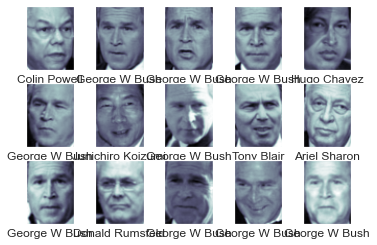

{'svc__C': 50, 'svc__gamma': 0.005}


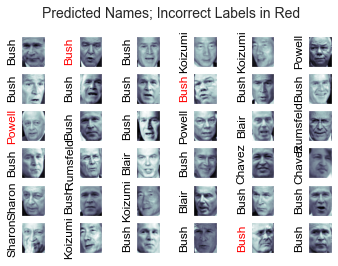

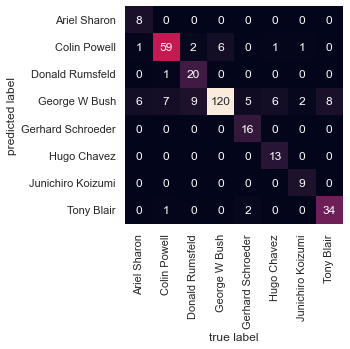

Accuracy =  0.827893175074184


In [2]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))